In [1]:
import scanpy as sc
import torch
from deepmap import DeepMap
import warnings

In [2]:
torch.cuda.set_device(1)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../datasets/preprocessed/Preoptic_RNA_MERFISH.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 94741 × 153
    obs: 'celltype', 'batch'

In [6]:
adata.obs

,celltype,batch
AAACCTGAGATGTGGC-1,Fibroblast,RNA
AAACCTGCACACAGAG-1,Excitatory,RNA
AAACCTGCACTACAGT-1,Inhibitory,RNA
AAACCTGTCAGGATCT-1,Excitatory,RNA
AAACCTGTCGCACTCT-1,OD Mature,RNA
...,...,...
b8be6c44-1b3a-4eb8-9cf9-827772348add,OD Mature,MERFISH
7d6f8abd-4529-44a9-bebb-40f42ab0ccb1,OD Mature,MERFISH
9e7e7c84-7dcc-4eef-a9ed-9fc80d55e938,OD Immature,MERFISH
6b666f81-7b73-4100-9e02-b5381b39f0f3,OD Mature,MERFISH


In [7]:
batch_key = 'batch'

model = DeepMap(k = 10, mnn_only = True)
model.preprocess(adata, batch_key, gene_num = 4000, scale = False)
model.integrate(n_iters = 8000, beta = 0.01, n_reconstructs = 10)

Wed Jun 14 20:50:35 2023 Data normalization ...
Wed Jun 14 20:50:35 2023 Finding highly variable genes ...
Wed Jun 14 20:50:35 2023 Found 153 highly variable genes
Wed Jun 14 20:50:35 2023 Saving unscaled data ...
Wed Jun 14 20:50:35 2023 Performing PCA ...
Wed Jun 14 20:50:38 2023 Start integrating ...
Wed Jun 14 20:50:38 2023 GPU used.
Wed Jun 14 20:50:38 2023 Finding neighbors ...
Wed Jun 14 20:50:45 2023 Initial neighbor search completed, time used: 6.2 seconds.
Wed Jun 14 20:52:19 2023 Reconstructing neighbors 1/10 ...
Wed Jun 14 20:52:34 2023 Reconstructing neighbors 2/10 ...
Wed Jun 14 20:52:50 2023 Reconstructing neighbors 3/10 ...
Wed Jun 14 20:53:05 2023 Reconstructing neighbors 4/10 ...
Wed Jun 14 20:53:20 2023 Reconstructing neighbors 5/10 ...
Wed Jun 14 20:53:34 2023 Reconstructing neighbors 6/10 ...
Wed Jun 14 20:53:49 2023 Reconstructing neighbors 7/10 ...
Wed Jun 14 20:54:04 2023 Reconstructing neighbors 8/10 ...
Wed Jun 14 20:54:19 2023 Reconstructing neighbors 9/10 ..

In [8]:
model.integrated

View of AnnData object with n_obs × n_vars = 94741 × 20
    obs: 'celltype', 'batch'

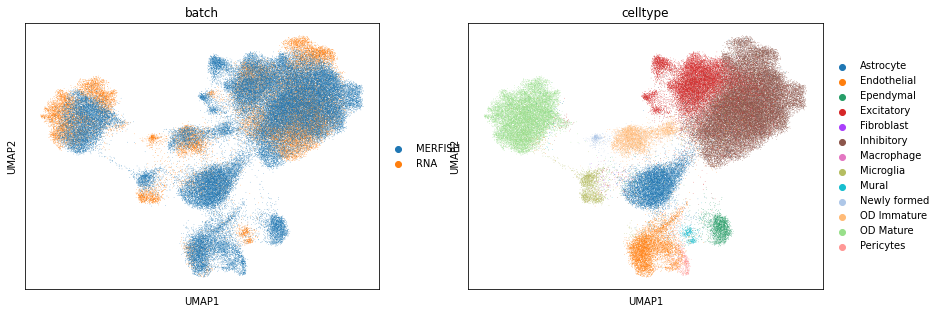

In [9]:
sc.pp.neighbors(model.integrated)
sc.tl.umap(model.integrated)
sc.pl.umap(model.integrated, color = ['batch', 'celltype'])